<a href="https://colab.research.google.com/github/sharmaishaa/diabetic-analysis/blob/main/diabetic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

In [35]:
dataset_path = '/content/diabetis.csv'



diabetes_dataset = pd.read_csv(dataset_path)
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, np.nan)
    diabetes_dataset[col] = diabetes_dataset[col].fillna(diabetes_dataset[col].median())

diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [37]:
X_full = diabetes_dataset.drop(columns='Outcome')
Y_full = diabetes_dataset['Outcome']

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled_full, Y_full, test_size=0.2, random_state=42, stratify=Y_full
)


In [38]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(Y_test, y_pred) * 100, "%")


Model Accuracy: 75.97402597402598 %


In [39]:
feature_means = diabetes_dataset.mean()

def get_input_with_mean(col_name):
    val = input(f"{col_name} [{feature_means[col_name]:.2f}]: ").strip()
    if val == "":
        print(f" → Using mean: {feature_means[col_name]:.2f}")
        return float(feature_means[col_name])
    return float(val)


In [40]:
print("\n🔹 Enter values (or press ENTER for dataset averages):")

X_user_input = np.array([
    get_input_with_mean('Pregnancies'),
    get_input_with_mean('Glucose'),
    get_input_with_mean('BloodPressure'),
    get_input_with_mean('SkinThickness'),
    get_input_with_mean('Insulin'),
    get_input_with_mean('BMI'),
    get_input_with_mean('DiabetesPedigreeFunction'),
    get_input_with_mean('Age')
]).reshape(1, -1)

X_user_scaled = scaler.transform(X_user_input)

prediction = model.predict(X_user_scaled)[0]

print("\n======== RESULT ========")
if prediction == 0:
    print("Prediction: ❎ Non-Diabetic")
else:
    print("Prediction: ✅ Diabetic")



🔹 Enter values (or press ENTER for dataset averages):
Pregnancies [3.85]: 4
Glucose [121.66]: 876
BloodPressure [72.39]: 87
SkinThickness [29.11]: 89
Insulin [140.67]: 87
BMI [32.46]: 86
DiabetesPedigreeFunction [0.47]: 98
Age [33.24]: 87

======== RESULT ========
Prediction: ❎ Non-Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
choice = input("\nWould you like a diet plan? (yes/no): ").lower()

if choice == "yes":
    glucose = X_user_input[0,1]
    bmi     = X_user_input[0,5]

    print("\n--- Personalized Diet Plan ---")
    print("- Eat whole grains, vegetables, fruits.")
    print("- Avoid sugary drinks & junk food.")
    print("- Prefer high fiber, low glycemic foods.")

    if glucose > 125:
        print("\n👉 Based on GLUCOSE:")
        print("- Reduce simple carbs.")
        print("- Choose low GI foods.")

    if bmi > 25:
        print("\n👉 Based on BMI:")
        print("- Aim for a calorie deficit.")
        print("- 30 min walking daily.")
else:
    print("No diet plan requested.")



Would you like a diet plan? (yes/no): 98
No diet plan requested.


In [42]:
def create_radar_chart(user_values, standard_values, labels):
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    user = user_values.flatten().tolist()
    standard = standard_values.flatten().tolist()

    user += user[:1]
    standard += standard[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    ax.plot(angles, user, linewidth=2, label='Your Input')
    ax.fill(angles, user, alpha=0.25)

    ax.plot(angles, standard, linewidth=2, label='Standard Healthy Values')
    ax.fill(angles, standard, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title("Your Health vs Healthy Standard Values", size=14)
    ax.grid(True)
    ax.legend(loc='upper right')

    plt.show()


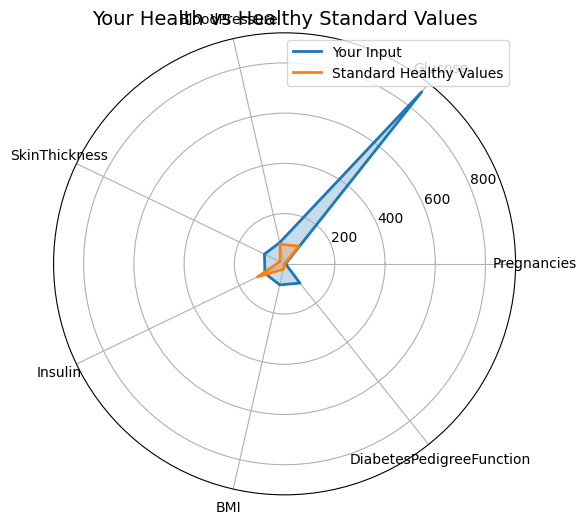

In [43]:
# Labels (excluding Age)
labels = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction'
]

# Standard accurate healthy reference values
standard_values = np.array([
    0,      # Pregnancies
    90,     # Glucose
    80,     # Blood Pressure
    20,     # Skin Thickness
    120,    # Insulin
    22,     # BMI
    0.3     # DPF
]).reshape(1, -1)

# User input without AGE
user_values = X_user_input[:, :7]

# Create radar chart
create_radar_chart(user_values, standard_values, labels)


In [44]:
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, y_train_pred) * 100
print(f"Training Accuracy: {training_accuracy:.2f} %")

Training Accuracy: 99.35 %



Confusion Matrix for Test Data:
[[87 13]
 [24 30]]

Confusion Matrix for Training Data:
[[400   0]
 [  4 210]]


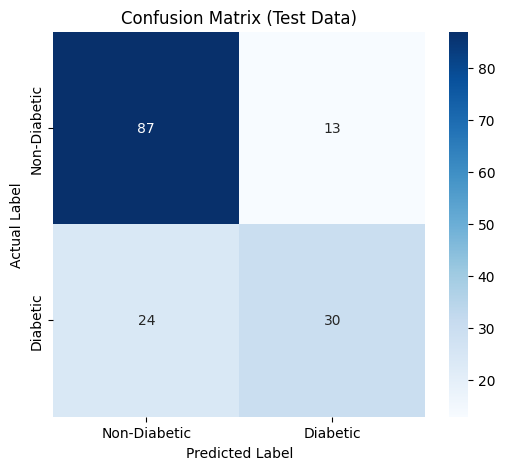

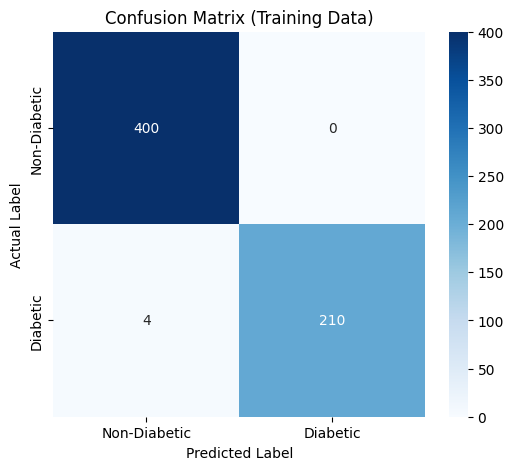

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for test data
cm_test = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix for Test Data:")
print(cm_test)

# Generate confusion matrix for training data
y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(Y_train, y_train_pred)
print("\nConfusion Matrix for Training Data:")
print(cm_train)

# Plotting function for confusion matrix
def plot_confusion_matrix(cm, title, labels=['Non-Diabetic', 'Diabetic']):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm_test, 'Confusion Matrix (Test Data)')
plot_confusion_matrix(cm_train, 'Confusion Matrix (Training Data)')

In [46]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available cores
    verbose=2, # Detailed output during the search
    scoring='accuracy' # Metric to optimize
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_ * 100:.2f} %")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy: 77.69 %


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available cores
    verbose=2, # Detailed output during the search
    scoring='accuracy' # Metric to optimize
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_ * 100:.2f} %")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
best_params = grid_search.best_params_

optimized_model = RandomForestClassifier(**best_params, random_state=42)

optimized_model.fit(X_train, Y_train)

print("Optimized RandomForestClassifier trained successfully with best parameters.")